Shape: (74682, 4)
      0            1         2  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                   3  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


C:\Users\hp\AppData\Local\Temp\ipykernel_1088\1270704710.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="sentiment", data=df, order=df["sentiment"].value_counts().index, palette="Set2")


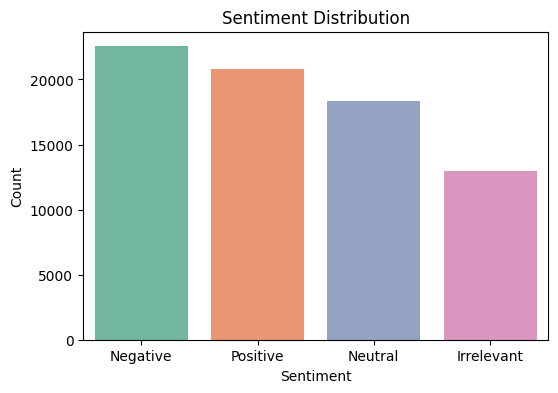

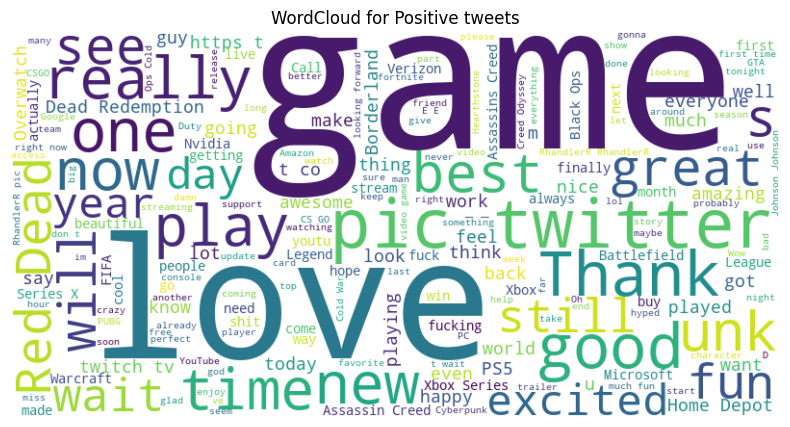

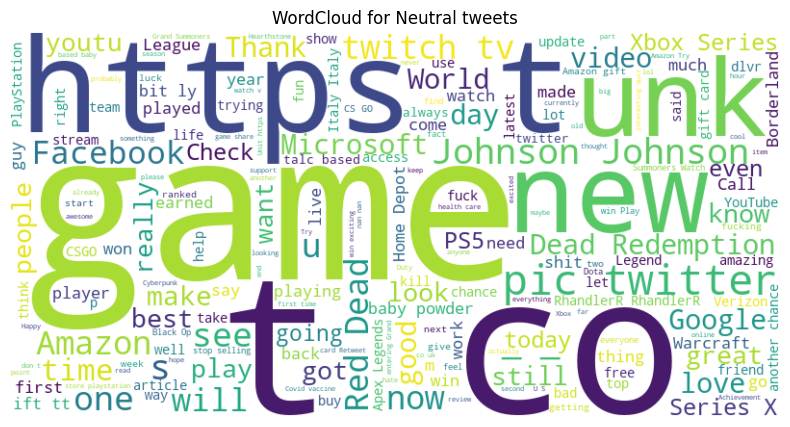

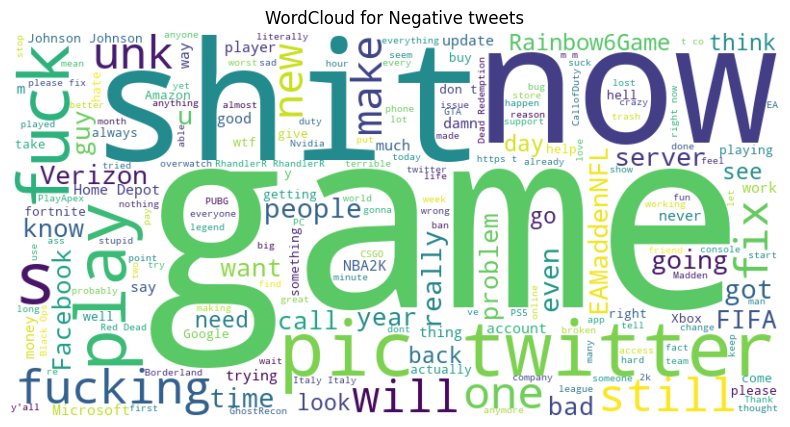

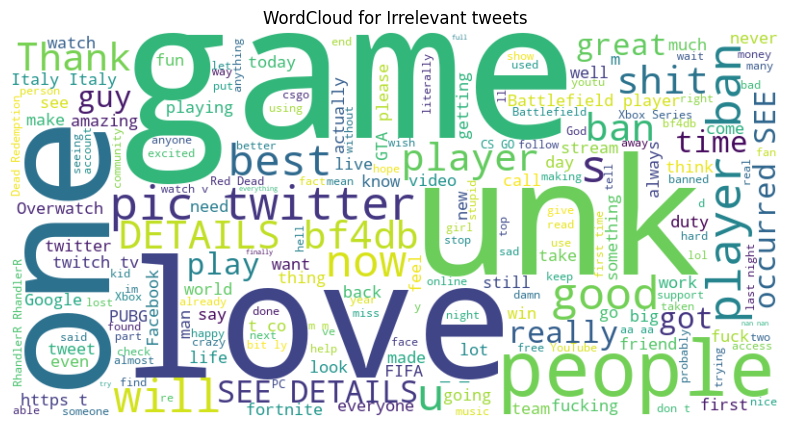

C:\Users\hp\AppData\Local\Temp\ipykernel_1088\1270704710.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[x[1] for x in pos_common], y=[x[0] for x in pos_common], palette="Greens_r")


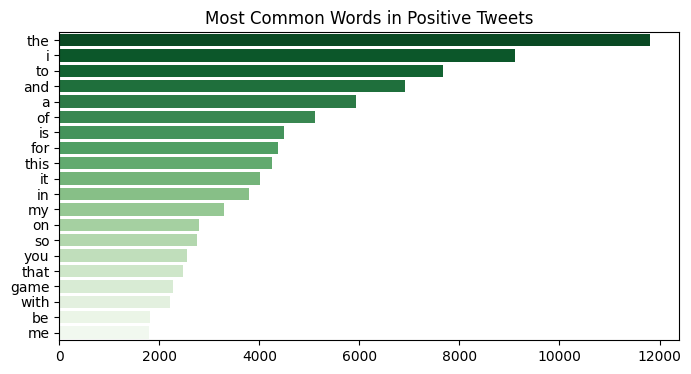

In [1]:

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

# 1. Load dataset
df = pd.read_csv("twitter_training (1).csv", header=None)
print("Shape:", df.shape)
print(df.head())

# The dataset usually has columns like: ID, Entity, Sentiment, Tweet
df.columns = ["id", "entity", "sentiment", "tweet"]

# 2. Sentiment distribution
plt.figure(figsize=(6,4))
sns.countplot(x="sentiment", data=df, order=df["sentiment"].value_counts().index, palette="Set2")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# 3. WordClouds for each sentiment
stopwords = set(STOPWORDS)

for sentiment in df["sentiment"].unique():
    text = " ".join(df[df["sentiment"]==sentiment]["tweet"].astype(str))
    wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(text)
    
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"WordCloud for {sentiment} tweets")
    plt.show()

# 4. Top frequent words (example for Positive tweets)
from collections import Counter
import re

def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # remove links
    text = re.sub(r"[^A-Za-z\s]", "", text)  # remove special chars
    return text.lower()

df["clean_tweet"] = df["tweet"].astype(str).apply(clean_text)

positive_words = " ".join(df[df["sentiment"]=="Positive"]["clean_tweet"]).split()
pos_common = Counter(positive_words).most_common(20)

plt.figure(figsize=(8,4))
sns.barplot(x=[x[1] for x in pos_common], y=[x[0] for x in pos_common], palette="Greens_r")
plt.title("Most Common Words in Positive Tweets")
plt.show()